# download files from gcp

In [4]:
!gsutil ls gs://pooklabucket/osld_datasets/

gs://pooklabucket/osld_datasets/
gs://pooklabucket/osld_datasets/logo-images.tar.gz
gs://pooklabucket/osld_datasets/product-images.tar.gz
gs://pooklabucket/osld_datasets/annotations/


In [1]:
!gsutil cp gs://pooklabucket/osld_datasets/logo-images.tar.gz .

Copying gs://pooklabucket/osld_datasets/logo-images.tar.gz...
- [1 files][454.0 MiB/454.0 MiB]                                                
Operation completed over 1 objects/454.0 MiB.                                    


In [1]:
!gsutil cp gs://pooklabucket/osld_datasets/product-images.tar.gz .

Copying gs://pooklabucket/osld_datasets/product-images.tar.gz...
| [1 files][564.5 MiB/564.5 MiB]                                                
Operation completed over 1 objects/564.5 MiB.                                    


In [19]:
!gsutil -m cp -r gs://pooklabucket/osld_datasets/annotations/ .

Copying gs://pooklabucket/osld_datasets/annotations/osld-test.json...
Copying gs://pooklabucket/osld_datasets/annotations/osld-test.pkl...            
Copying gs://pooklabucket/osld_datasets/annotations/osld-train.json...          
Copying gs://pooklabucket/osld_datasets/annotations/osld-val.pkl...             
Copying gs://pooklabucket/osld_datasets/annotations/osld-train.pkl...           
Copying gs://pooklabucket/osld_datasets/annotations/osld-val.json...
/ [6/6 files][  6.0 MiB/  6.0 MiB] 100% Done                                    
Operation completed over 6 objects/6.0 MiB.                                      


# preprocess files

In [35]:
!pip install Pillow

/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
     |████████████████████████████████| 4.5 MB 17.7 MB/s eta 0:00:01


In [2]:
import os
import json
from PIL import Image
import shutil 

In [20]:
# Define paths
bucket_path = "."
logo_archive = "./logo-images.tar.gz"
product_archive = "./product-images.tar.gz"
annotations_path = "./annotations"

In [4]:
# # Define directories for storing extracted images
# output_dirs = {
#     'logo': {'train': 'train-logo', 'test': 'test-logo', 'val': 'val-logo'},
#     'product': {'train': 'train-product', 'test': 'test-product', 'val': 'val-product'}
# }

# # Create output directories if they don’t exist
# for dir_type, paths in output_dirs.items():
#     for path in paths.values():
#         os.makedirs(path, exist_ok=True)

In [10]:
!df -h  # Shows disk usage in human-readable format


Filesystem      Size  Used Avail Use% Mounted on
/dev/root        20G   19G  685M  97% /
devtmpfs        3.9G     0  3.9G   0% /dev
tmpfs           3.9G     0  3.9G   0% /dev/shm
tmpfs           794M 1008K  793M   1% /run
tmpfs           5.0M     0  5.0M   0% /run/lock
tmpfs           3.9G     0  3.9G   0% /sys/fs/cgroup
/dev/loop0       64M   64M     0 100% /snap/core20/2379
/dev/loop1      374M  374M     0 100% /snap/google-cloud-cli/279
/dev/loop2       92M   92M     0 100% /snap/lxd/29619
/dev/loop3       39M   39M     0 100% /snap/snapd/21759
/dev/sda15      105M  6.1M   99M   6% /boot/efi
/dev/loop4       64M   64M     0 100% /snap/core20/2434
tmpfs           794M  4.0K  794M   1% /run/user/1002


In [15]:
rm -rf ~/.local/share/Trash/*

In [11]:
import tarfile
import os

def extract_archive_flat(archive_path, destination):
    # Open the tar file in the standard mode
    with tarfile.open(archive_path, 'r:') as archive:
        for member in archive.getmembers():
            member.name = os.path.basename(member.name)  # Flatten the directory structure
            dest_path = os.path.join(destination, member.name)
            
            # Handle duplicate filenames
            if os.path.exists(dest_path):
                base, extension = os.path.splitext(member.name)
                counter = 1
                while os.path.exists(dest_path):
                    member.name = f"{base}_{counter}{extension}"
                    dest_path = os.path.join(destination, member.name)
                    counter += 1

            archive.extract(member, destination)

# Paths for the archives
# logo_archive = "./logo-images.tar.gz"
product_archive = "./product-images.tar.gz"

# Extract directly into the desired folders without nesting
# extract_archive_flat(logo_archive, './logo-images')
extract_archive_flat(product_archive, './product-images')

In [30]:
# # Function to crop images based on bounding boxes
# def crop_image(image, bbox):
#     x1, y1, x2, y2 = bbox
#     return image.crop((x1, y1, x2, y2))

# # Process each annotation JSON file and crop/save images accordingly
# def process_annotations(split):
#     json_path = f"./annotations/osld-{split}.json"
    
#     # Load the JSON file for each split (train, test, val)
#     with open(json_path, 'r') as f:
#         annotations = json.load(f)
    
#     for product_image_name, details in annotations.items():
#         product_image_path = os.path.join('product-images', product_image_name)
        
#         # Check if the product image exists
#         if not os.path.exists(product_image_path):
#             print(f"Warning: {product_image_path} not found, skipping.")
#             continue

#         with Image.open(product_image_path) as img:
#             for region, logo_image_name in details:
#                 # Crop the product image based on bounding box
#                 cropped_img = crop_image(img, region)
                
#                 # Save cropped product image
#                 cropped_product_path = os.path.join(output_dirs['cropped_product'][split], f"cropped_{product_image_name}")
#                 cropped_img.save(cropped_product_path)

#                 # Locate the corresponding logo image and save it in the appropriate folder
#                 logo_image_path = os.path.join('logo-images', logo_image_name)
#                 if os.path.exists(logo_image_path):
#                     logo_dest_path = os.path.join(output_dirs['logo'][split], logo_image_name)
#                     shutil.copy2(logo_image_path, logo_dest_path)
#                 else:
#                     print(f"Warning: Logo image {logo_image_name} not found, skipping.")

In [ ]:
import os
import shutil
import json
from PIL import Image

# Process each annotation JSON file and copy images to the appropriate folder based on annotations
def process_annotations(split, output_dirs):
    json_path = f"./annotations/osld-{split}.json"
    
    # Load the JSON file for each split (train, test, val)
    with open(json_path, 'r') as f:
        annotations = json.load(f)
    
    for product_image_name, details in annotations.items():
        product_image_path = os.path.join('product-images', product_image_name)
        
        # Check if the product image exists
        if not os.path.exists(product_image_path):
            print(f"Warning: {product_image_path} not found, skipping.")
            continue

        # Iterate through each annotation region for this image
        for region, logo_image_name in details:
            base_logo_name = logo_image_name.split('-')[0]  # Extract the base logo name
            
            # Skip unknown logos
            if base_logo_name == '__unknown__' or logo_image_name == '__unknown__':
                continue

            # Create the destination folder for the base logo if it doesn't exist
            logo_folder_path = os.path.join(output_dirs['cropped_product'][split], base_logo_name)
            if not os.path.exists(logo_folder_path):
                os.makedirs(logo_folder_path)

            # Copy the original image to the folder for the base logo
            dest_image_path = os.path.join(logo_folder_path, f"{product_image_name}")
            shutil.copy2(product_image_path, dest_image_path)  # Copy the original image

            # Also copy the corresponding logo image to the logo folder (if needed)
            logo_image_path = os.path.join('logo-images', logo_image_name)
            if os.path.exists(logo_image_path):
                logo_dest_path = os.path.join(output_dirs['logo'][split], logo_image_name)
                shutil.copy2(logo_image_path, logo_dest_path)
            else:
                print(f"Warning: Logo image {logo_image_name} not found, skipping.")


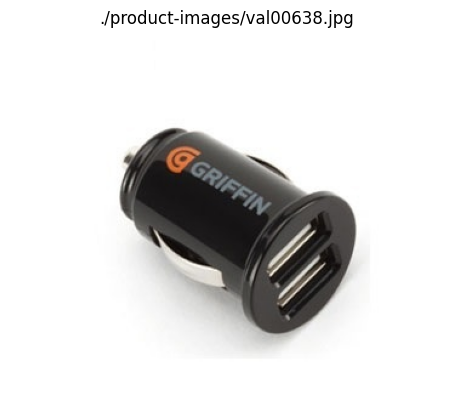

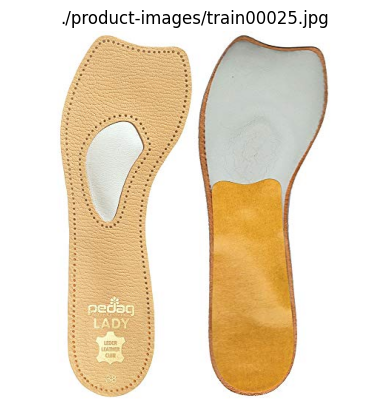

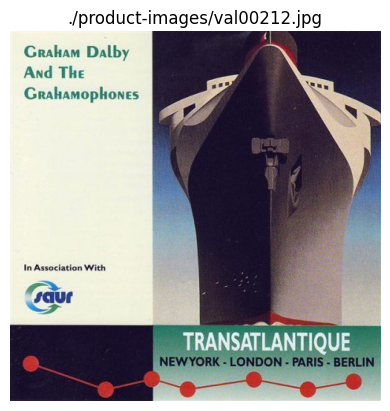

In [14]:
import matplotlib.pyplot as plt

# Function to display previews of images
def show_previews(folder_path, num_images=3):
    files = os.listdir(folder_path)[:num_images]  # Get the first few images
    for file in files:
        image_path = os.path.join(folder_path, file)
        if os.path.isfile(image_path):
            img = Image.open(image_path)
            plt.figure()
            plt.imshow(img)
            plt.title(f"{folder_path}/{file}")
            plt.axis('off')
            plt.show()

# Display previews of the first 3 images in 'train-cropped-product'
show_previews("./product-images", num_images=3)

In [ ]:
# Run the processing for train, test, and val splits
for split in ['train', 'test', 'val']:
    process_annotations(split)

In [42]:
!pip install matplotlib

/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point


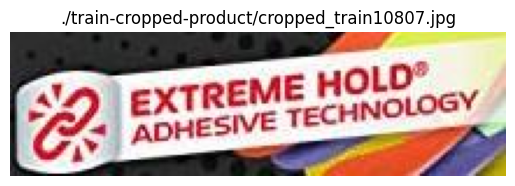

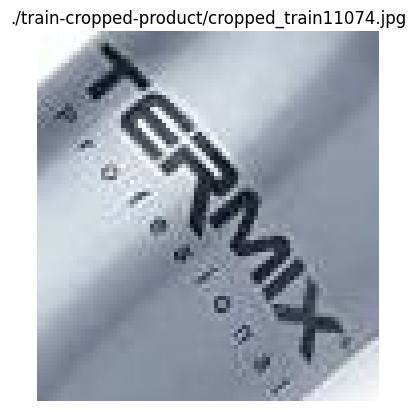

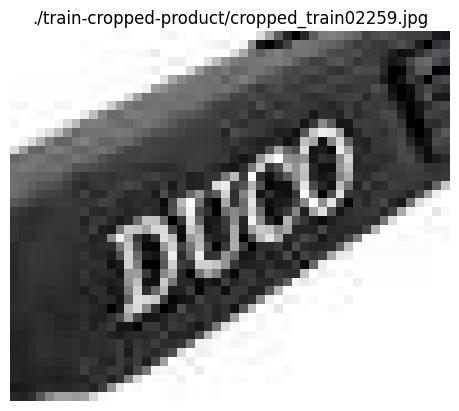

In [7]:
import matplotlib.pyplot as plt

# Function to display previews of images
def show_previews(folder_path, num_images=3):
    files = os.listdir(folder_path)[:num_images]  # Get the first few images
    for file in files:
        image_path = os.path.join(folder_path, file)
        if os.path.isfile(image_path):
            img = Image.open(image_path)
            plt.figure()
            plt.imshow(img)
            plt.title(f"{folder_path}/{file}")
            plt.axis('off')
            plt.show()

# Display previews of the first 3 images in 'train-cropped-product'
show_previews("./train-cropped-product", num_images=3)


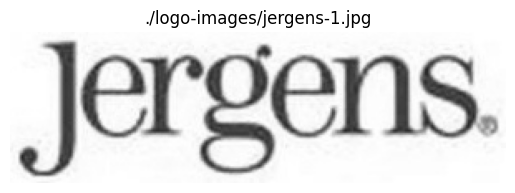

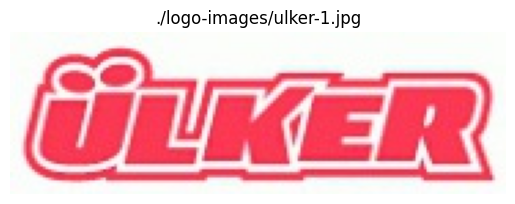

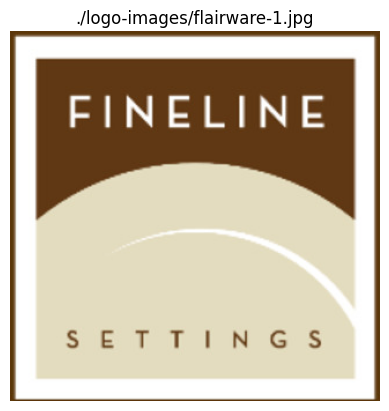

In [8]:
# Display previews of the first 3 images in 'train-cropped-product'
show_previews("./logo-images", num_images=3)

In [9]:
import os

# Define the path to the directory
directory = './logo-images'  # Replace with your folder path

# List all items in the directory
items = os.listdir(directory)

# Count the number of items
num_items = len(items)
print(f"There are {num_items} items in the '{directory}' folder.")

There are 20850 items in the './logo-images' folder.


In [10]:
import os

# Define the path to the directory
directory = './train-cropped-product'  # Replace with your folder path

# List all items in the directory
items = os.listdir(directory)

# Count the number of items
num_items = len(items)
print(f"There are {num_items} items in the '{directory}' folder.")


There are 15445 items in the './train-cropped-product' folder.


In [11]:
# Define the path to the directory
directory = './test-cropped-product'  # Replace with your folder path

# List all items in the directory
items = os.listdir(directory)

# Count the number of items
num_items = len(items)
print(f"There are {num_items} items in the '{directory}' folder.")

There are 2233 items in the './test-cropped-product' folder.


In [12]:
# Define the path to the directory
directory = './val-cropped-product'  # Replace with your folder path

# List all items in the directory
items = os.listdir(directory)

# Count the number of items
num_items = len(items)
print(f"There are {num_items} items in the '{directory}' folder.")

There are 1642 items in the './val-cropped-product' folder.
